# Zadanie "Transportation problem"
Naszym zadaniem było wykorzystanie metody programowania liniowego do rozwiązania problemu znanego jako "transportation problem". Problem wygląda nastepująco: W dwóch fabrykach X i Y oddalonych od siebie, produkowane są piwa w ilości 20 sztuk w każdej z nich. Produkt musi zostać dostarczony do klientów w różnych ilościach. Koszty transportu są różne w zależności od fabryki i klienta. Naszym celem jest znalezieniu takiego planu dostaw z fabryk X i Y do klientów, który będzie zapewniał najniższy koszt transportu i zarazem spełniał ich zapotrzebowania.
Wizualizacja problemu jest widoczna poniżej.

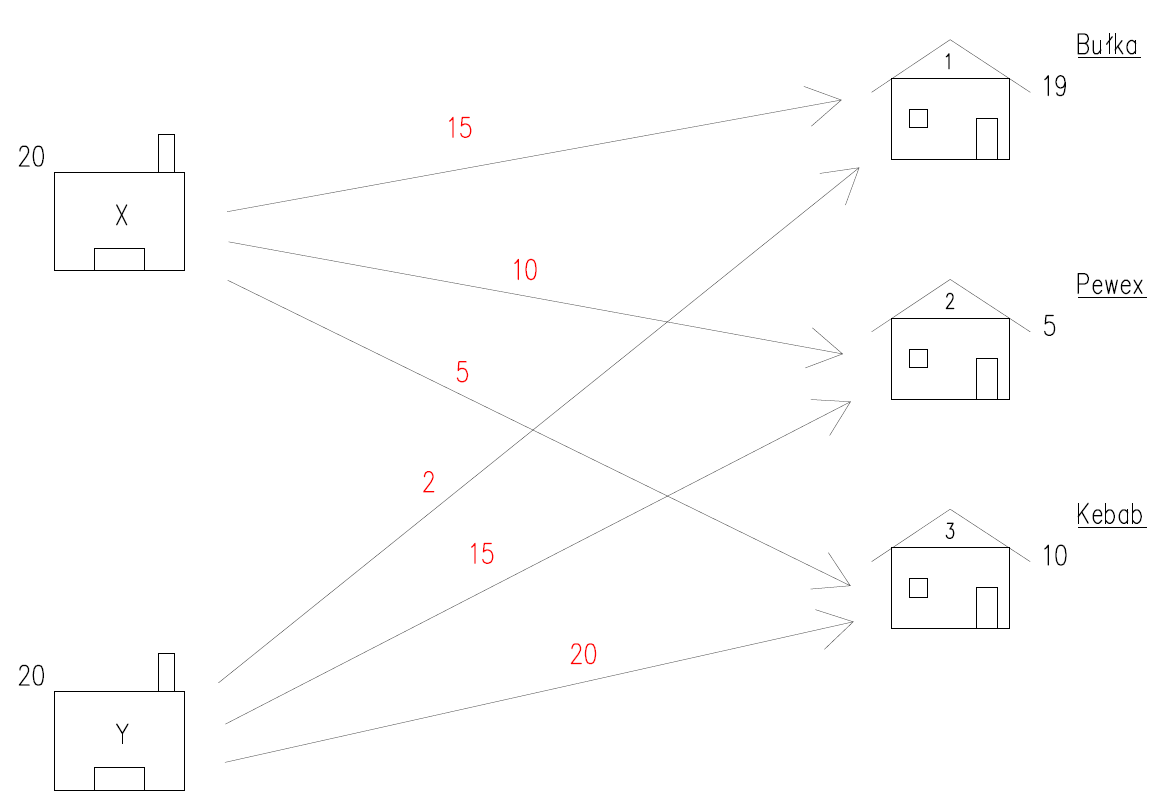

# Podpunkt A
Mamy za zadanie rozwieść wszystkie piwa produkowane w fabrykach, razem 40 sztuk. Łączne zapotrzebowanie klientów wynosi 34 sztuki. Nadmiarowe produkty z fabryk moga zostać przetransportowane za darmo do magazynu ale dopiero, gdy zapotrzebowanie klientów na produkt zostanie spełnione. Dążmymy do minimalizacji kosztów transportu.

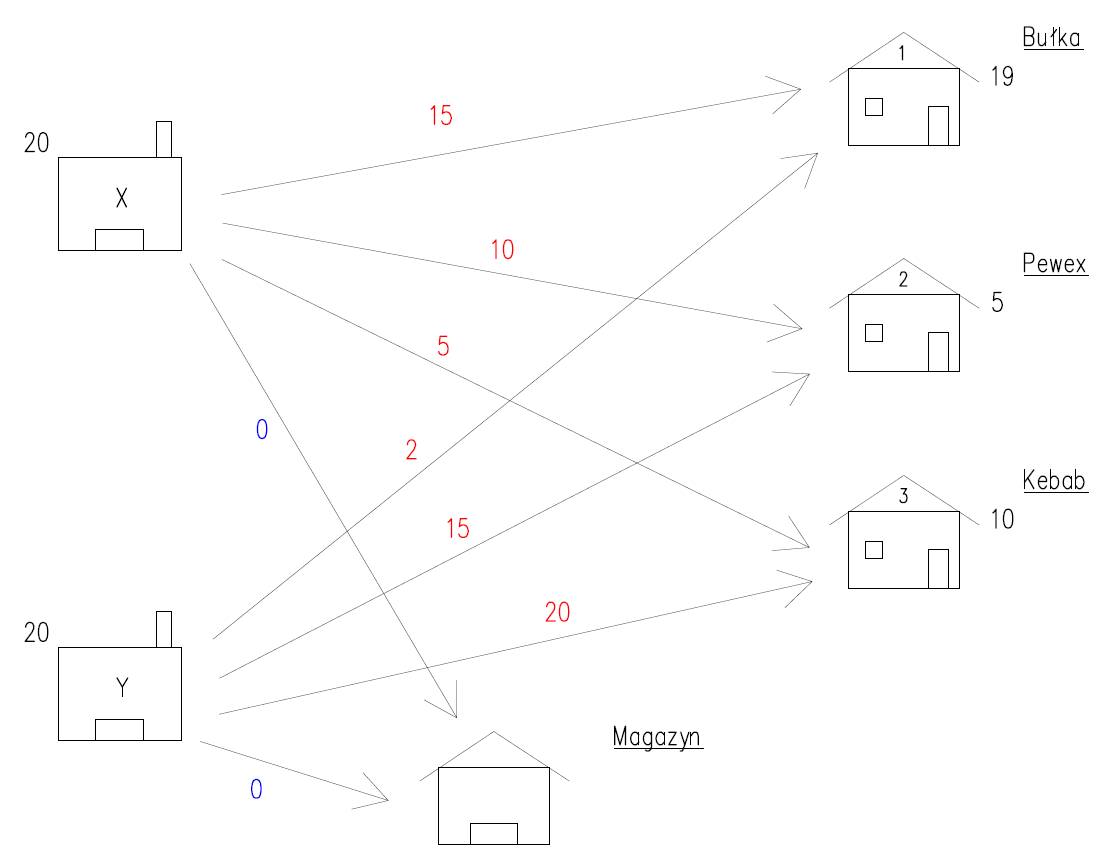

In [1]:
# Rozwiązanie problemu.

# Import bibliotek używanych do rozwiązania problemu.
from pulp import *
import pandas as pd
# Tworzenie problemu i jego minimalizacja.
prob = LpProblem("Transportation Problem",LpMinimize)

# Zmienne związane z problemem.
bar = ["Bułka","Pewex","Kebab","Magazyn"]
koszt = [15,10,5,0,2,15,20,0]
zapotrzebowanie = [19,5,10]

# Przypisanie każdej z fabryk transportu do danego klienta.
zmiennaX = []
zmiennaY = []
for k in bar:
    zmiennaX.append(LpVariable(f"Z_browaru_X_do_baru_{k}",0))
    zmiennaY.append(LpVariable(f"Z_browaru_Y_do_baru_{k}",0))
    
# Wyznaczenie funkcji celu, która będzie minimalizowana.
zmienna=zmiennaX + zmiennaY
suma = 0
for i in range(len(zmienna)):
    suma += zmienna[i]*koszt[i]
prob += suma

for i in range(len(bar)-1):
    prob+=zmiennaX[i]+zmiennaY[i]==zapotrzebowanie[i]
    
# Wprowadzenie ograniczeń i warunków
prob+= sum(zmiennaX) == 20
prob+= sum(zmiennaY) == 20

# Rozwiązywanie problemu.
prob.solve()

# Wyświetlenie statusu rozwiązania na ekranie.
print("Status:", LpStatus[prob.status])

# Wyświetal każdą ze zmiennych z ustaloną optymalną wartością.
for v in prob.variables():
    print(v.name, "=", v.varValue)
# Wyświetlenie zoptymalizowanej wartości kosztu transportu.
print("\nNajniższy koszt transportu {} zł  ".format( value(prob.objective)))

Status: Optimal
Z_browaru_X_do_baru_Bułka = 0.0
Z_browaru_X_do_baru_Kebab = 10.0
Z_browaru_X_do_baru_Magazyn = 5.0
Z_browaru_X_do_baru_Pewex = 5.0
Z_browaru_Y_do_baru_Bułka = 19.0
Z_browaru_Y_do_baru_Kebab = 0.0
Z_browaru_Y_do_baru_Magazyn = 1.0
Z_browaru_Y_do_baru_Pewex = 0.0

Najniższy koszt transportu 138.0 zł  


c:\users\msi\appdata\local\programs\python\python38-32\lib\site-packages\pulp\pulp.py:1137: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
